# Loading data from S3

On the [Informatics Lab flavour of Pangeo](https://github.com/informatics-lab/our-pangeo) we have [AWS S3](https://aws.amazon.com/s3/) mounted to the local filesystem at `/s3/`. 
This is a [special mount](https://github.com/informatics-lab/s3-fuse-flex-volume) which allows us to access objects in S3 buckets using the following path format `/s3/<bucket name>/<object key>`.

In this notebook we will load a NetCDF file from S3 using [iris](https://scitools.org.uk/iris/docs/latest/), demonstrate extracting a single variable, accessing data within it and plotting it.

## Imports
For this we will need `iris` and `matplotlib`.

In [3]:
import iris

import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import iris.quickplot as qplt

import warnings  # Useful for supressing some of the chatty iris warnings


## Loading the file

In this example we will load a NetCDF file which has been created by the [MOGREPS](https://www.metoffice.gov.uk/research/weather/ensemble-forecasting/mogreps) Global model and is stored in the bucket `mogreps-uk` with the key `prods_op_mogreps-uk_20130102_15_19_021.nc`. This file is part of the [Met Office open data on AWS Earth](https://aws.amazon.com/public-datasets/mogreps/).

In [4]:
FILE_PATH = "/s3/mogreps-uk/prods_op_mogreps-uk_20130102_15_19_021.nc"

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cubelist = iris.load(FILE_PATH)
print(cubelist)

0: stratiform_snowfall_rate / (kg m-2 s-1) (time: 36; grid_latitude: 548; grid_longitude: 421)
1: cloud_area_fraction_assuming_maximum_random_overlap / (1) (time: 3; grid_latitude: 548; grid_longitude: 421)
2: wet_bulb_freezing_level_altitude / (m) (time: 3; grid_latitude: 548; grid_longitude: 421)
3: wet_bulb_potential_temperature / (K) (time: 3; pressure: 3; grid_latitude: 548; grid_longitude: 421)
4: cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (time: 3; grid_latitude: 548; grid_longitude: 421)
5: air_pressure_at_sea_level / (Pa)    (time: 3; grid_latitude: 548; grid_longitude: 421)
6: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
7: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
8: air_temperature / (K)               (time: 3; grid_latitude: 548; grid_longitude: 421)
9: air_temperature / (K)               (time: 3; pressure: 2; grid_latitude: 548; grid_l

## Extracting a cube
This file contains a cube for each variable that was produced by the model and returns them to you in a `CubeList`. Let's extract [wet bulb potential temperature](https://en.wikipedia.org/wiki/Wet-bulb_potential_temperature) and explore the data further.

In [6]:
[wbpt] = cubelist.extract(iris.Constraint(name='wet_bulb_potential_temperature'))
wbpt

<iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 3; pressure: 3; grid_latitude: 548; grid_longitude: 421)>

We can see here that the cube has four dimensions of time, pressure (altitude), latitide and longitude with lengths of 3, 3, 548 and 421 respectively. 

## Slicing and dicing

When iris loads a NetCDF file it is doing this in a 'lazy' way. This means that it opens the file and reads the metadata headers, but not the actual data itself. However we can force it to read the data by attempting to access it, the main benefit being that if we only try to access a subset of the data it will only read that subset. This means files load very quickly and we only read the bytes we need.

In [9]:
# Get a single point from the cube
print(wbpt[0,0,0,1].data)

290.75


In [10]:
# Get a 1D column from our 4D cube
print(wbpt[0,0,0].data)

[290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75
 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75
 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75
 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75 290.75
 290.75 290.75 290.75 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875 290.875
 291.0 291.0 291.0 291.0 291.0 291.0 291.0 291.0 291.0 291.0 2

In [11]:
# Get a 1D slice across dimensions in the cube
print(wbpt[0,:,0, 0].data)

[290.75 287.625 283.125]


## Plotting

We can now use matplotlib to plot one layer from our cube. We can plot a 2D map for the first timesteep at the lowest altutide by specifying `wbpt[0][0]`.

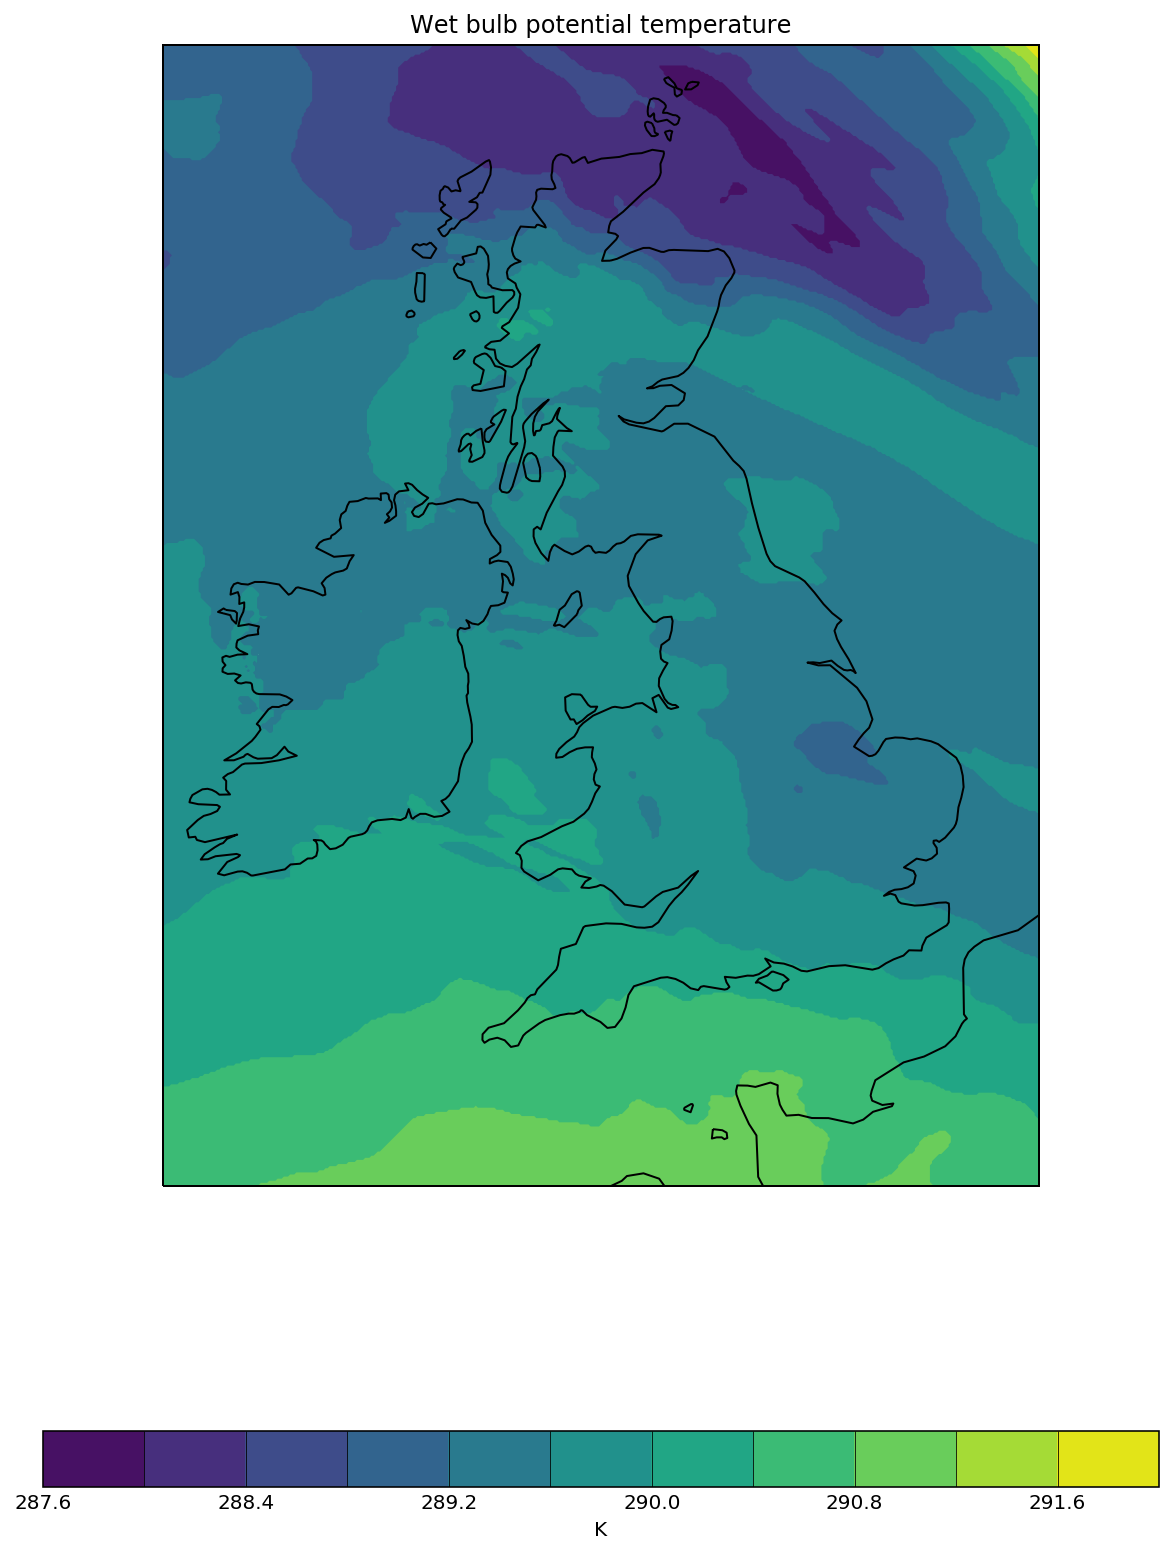

In [12]:
%config InlineBackend.figure_format = 'retina'  # Optional for retina displays

fig = plt.figure(figsize=(10, 15))

qplt.contourf(wbpt[0][0], 10, cmap=mpl_cm.get_cmap('viridis'))

# Add coastlines to the map created by contourf.
plt.gca().coastlines('50m')

plt.show()